In [1]:
import pandas as pd

Scottish Government are publishing data related to COVID-19 on their open statistics portal — statistics.gov.scot. This data is the data that supports Scottish Government’s daily updates, and is updated regularly.
We will use one of their CSV files to understand how to import data and work with it in Python.

The permalink to the csv download is [here](https://statistics.gov.scot/downloads/cube-table?uri=http%3A%2F%2Fstatistics.gov.scot%2Fdata%2Fcoronavirus-covid-19-management-information)

You can also down load it and have a look at it in Excel.

In [2]:
df = pd.read_csv("https://statistics.gov.scot/downloads/cube-table?uri=http%3A%2F%2Fstatistics.gov.scot%2Fdata%2Fcoronavirus-covid-19-management-information")

We will use the [Pandas library](https://pandas.pydata.org) to read this CSV file. This library already exists in the Anaconda installation.
Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language. Its key data structure is called the DataFrame. DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables.

We import pandas and usually give it the alias pd (see the first command in this notebook)
import pandas as pd

dframe = pd.read_csv(“file_name.csv”, header=None)

Using the argument header=None when reading the CSV file won’t use the first row as the column names.

In [3]:
df.head(5) # Return the first n rows.

,FeatureCode,FeatureName,FeatureType,DateCode,Measurement,Units,Value,Variable
0,S92000003,Scotland,Country,2021-08-11,Count,Testing (PCR) - People with first test results...,38233,Testing (PCR) - People with first test results...
1,S92000003,Scotland,Country,2021-08-12,Count,Testing (PCR) - People with first test results...,39144,Testing (PCR) - People with first test results...
2,S92000003,Scotland,Country,2021-08-10,Count,Testing (PCR) - People with first test results...,36871,Testing (PCR) - People with first test results...
3,S92000003,Scotland,Country,2021-11-01,Ratio,Schools - Percentage absence - Percentage of o...,1.49430664,Schools - Percentage absence - Percentage of o...
4,S92000003,Scotland,Country,2021-10-29,Ratio,Schools - Percentage absence - Percentage of o...,1.29406244,Schools - Percentage absence - Percentage of o...


In [4]:
df.dtypes # this commands helps to check the data types of each column

FeatureCode    object
FeatureName    object
FeatureType    object
DateCode       object
Measurement    object
Units          object
Value          object
Variable       object
dtype: object

We can see that 'Value' which provides the counts is not currently in a numeric format also DateCode is not in a date format. 

In [5]:
# Convert Value to numeric field and DateCode to a date
# By setting errors=’coerce’, non-numeric values arevtransformed to NaN.
df['Value'] = pd.to_numeric(df['Value'], errors='coerce') 
df['DateCode'] = pd.to_datetime(df['DateCode'])

In [6]:
df.dtypes

FeatureCode            object
FeatureName            object
FeatureType            object
DateCode       datetime64[ns]
Measurement            object
Units                  object
Value                 float64
Variable               object
dtype: object

You can rerun df.dtypes to check if the data types have now changed. 

In order to check the number of rows in this data frame. Try the following:

In [7]:
print('Number of rows :', len(df.index))

Number of rows : 57544


Lets get a smaller sample of data by focusing on rows which have 'COVID-19 patients in ICU - Confirmed' in the last column,  Variable.

In [8]:
df_icu_conf = df.query('Variable == "COVID-19 patients in ICU - Confirmed - Length of stay more than 28 days"')

In [9]:
print('The number of rows returned for this query is ', len(df_icu_conf.index))

The number of rows returned for this query is  444


Of these we are filtering the dataset down to the last 14 days to show confirmed deaths for all of Scotland  (S92000003); that is we are not looking at separate NHS boards in regions (e.g. Grampian would be Code
S08000020; Ayrshire and Arran S08000015; etc.) as these dont seem to have values in the tables. 

In [10]:
df_icu_conf_scot = df_icu_conf.query('FeatureCode == "S92000003"')

Note you can also use complex sql like queries such as groupby etc. to retreive from a pandas data frame, for instance like: df_icu_conf.groupby(by='FeatureCode').count()

In [11]:
df_icu_conf_scot.sort_values(by=['DateCode']) # lets sort it by DateCode

,FeatureCode,FeatureName,FeatureType,DateCode,Measurement,Units,Value,Variable
7240,S92000003,Scotland,Country,2021-01-20,Count,COVID-19 patients in ICU - Confirmed - Length ...,12.0,COVID-19 patients in ICU - Confirmed - Length ...
7236,S92000003,Scotland,Country,2021-01-21,Count,COVID-19 patients in ICU - Confirmed - Length ...,11.0,COVID-19 patients in ICU - Confirmed - Length ...
7235,S92000003,Scotland,Country,2021-01-22,Count,COVID-19 patients in ICU - Confirmed - Length ...,11.0,COVID-19 patients in ICU - Confirmed - Length ...
7237,S92000003,Scotland,Country,2021-01-23,Count,COVID-19 patients in ICU - Confirmed - Length ...,8.0,COVID-19 patients in ICU - Confirmed - Length ...
7244,S92000003,Scotland,Country,2021-01-24,Count,COVID-19 patients in ICU - Confirmed - Length ...,9.0,COVID-19 patients in ICU - Confirmed - Length ...
...,...,...,...,...,...,...,...,...
1845,S92000003,Scotland,Country,2022-04-04,Count,COVID-19 patients in ICU - Confirmed - Length ...,6.0,COVID-19 patients in ICU - Confirmed - Length ...
2167,S92000003,Scotland,Country,2022-04-05,Count,COVID-19 patients in ICU - Confirmed - Length ...,5.0,COVID-19 patients in ICU - Confirmed - Length ...
2043,S92000003,Scotland,Country,2022-04-06,Count,COVID-19 patients in ICU - Confirmed - Length ...,5.0,COVID-19 patients in ICU - Confirmed - Length ...
2592,S92000003,Scotland,Country,2022-04-07,Count,COVID-19 patients in ICU - Confirmed - Length ...,6.0,COVID-19 patients in ICU - Confirmed - Length ...


The data frame df_icu_conf_scot now contains all observations that relate to the confirmed number of COVID-19 patients in intensive care, in Scotland. 
Lets use this to draw a plot.

## Plotting the data
We will use the [matplotlib](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html) and [Seaborn](https://seaborn.pydata.org) libraries to plot the observations that relate to the confirmed number of COVID-19 patients in intensive care, in Scotland.
Note that Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

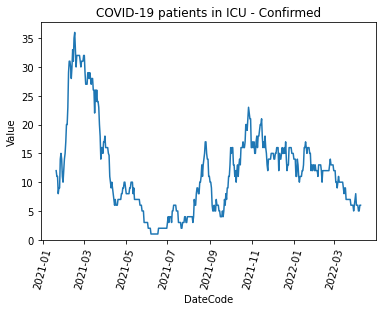

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

chart=sns.lineplot(x='DateCode', y='Value', data=df_icu_conf_scot) # use the df_icu_conf_scot as our data
chart.set_title('COVID-19 patients in ICU - Confirmed')  # add a title
chart.set_ylim(ymin=0) # set the y axis to start at zero 
for item in chart.get_xticklabels(): item.set_rotation(75) # rotate the x axis labels


### Generating a natural language summary for a single row

In [13]:
# get the most recent date from the data frame df_icu_conf_scot
df_icu_conf_latest = df_icu_conf_scot[df_icu_conf_scot['DateCode'] == df_icu_conf_scot['DateCode'].max()]

In [14]:
df_icu_conf_latest.head() 

,FeatureCode,FeatureName,FeatureType,DateCode,Measurement,Units,Value,Variable
1775,S92000003,Scotland,Country,2022-04-08,Count,COVID-19 patients in ICU - Confirmed - Length ...,6.0,COVID-19 patients in ICU - Confirmed - Length ...


To generate a natural language summary of this information we need to access each value in the column.

For example using iloc, we can get the value from the Value field and pass that into a variable, called current_count.

Again using iloc we can get the DateCode which is the date of the observation which we pass into another variable called lates_date, after some [formatting using strftime](https://strftime.org).

We can then use in a basic string concatenation to generate a natural lanague summary:

In [15]:
current_count = df_icu_conf_latest.iloc[0]['Value']
latest_date = df_icu_conf_latest.iloc[0]['DateCode'].strftime("%A %d %B %Y")
print("As at " + str(latest_date) + ", there were " + str(current_count) + " confirmed cases of COVID-19 in intensive care units in Scotland")

As at Friday 08 April 2022, there were 6.0 confirmed cases of COVID-19 in intensive care units in Scotland
